# Temporal Visualization

Python 3.5

In [2]:
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET
import os, sys, imp
import re
import random
import nltk
tokenizer = nltk.tokenize.treebank.TreebankWordTokenizer()
import string
import datetime
import imp
import math
import warnings

# Sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Network Analysis
import igraph
import scipy.spatial.distance as ssd

# Clustering
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram
from nltk.corpus import stopwords
from scipy.cluster.hierarchy import fcluster
from statistics import mean

In [3]:
warnings.filterwarnings("ignore")

In [4]:
punctuation = set(string.punctuation)

In [5]:
#os.chdir('/Users/hopeemac/Documents/Code/GIT/DSI_Religion/') # Change to Top Level GIT Directory
os.chdir('/Users/Seth/Documents/DSI/Capstone/2016-group/cloneOf2016Code/')

In [6]:
pwd

'/Users/Seth/Documents/DSI/Capstone/2016-group/cloneOf2016Code'

In [7]:
sys.path.append('./prototype_python') # Add location of python prototype to path

In [8]:
sys.path.append('./protest_temporalAnalysis/') # Add location of python prototype to path

In [9]:
import temporal_methods as tm
import semanticDensity as sd
import syntacticParsing as sp

## -- Set up Parameters for Analysis --

group = 'DorothyDay'
plotstart = '1933-01-01'
plotend = '1981-01-01'
plotfilename = 'DorothyDay_temporal.pdf'
saveplot = True

In [10]:
group = 'MLK-short'
#plotstart = '2007-01-01'
#plotend = '2016-01-01'
plotstart = '1954-01-01'
plotend = '1969-01-01'
plotfilename = 'MLK-short_temporal.pdf'
saveplot = True

group = 'MLK'
plotstart = '1954-01-01'
plotend = '1969-01-01'
plotfilename = 'MLK_temporal.pdf'
saveplot = True

group = 'Ghandi'
plotstart = '1915-01-01'
plotend = '1949-01-01'
plotfilename = 'Ghandi_temporal.pdf'
saveplot = True

### Build Metadata File for Analysis Text

In [11]:
if group == 'DorothyDay':
    dataloc = './protest_temporalAnalysis/data_activists/DorothyDay/raw/'
    fileData = tm.getDorothyDaymetadata(dataloc)
    print(fileData.date_clean.min(), fileData.date_clean.max())
    # 1933-05-01 00:00:00 1980-10-01 00:00:00

In [12]:
if group == 'WBC':
    dataloc = './data_dsicap/WBC/raw/'
    fileData = tm.getWBCmetadata(dataloc)
    print(fileData.date_clean.min(), fileData.date_clean.max())
    # 2007-05-27 00:00:00 2015-09-20 00:00:00

In [13]:
if group == 'MLK':
    dataloc = './protest_temporalAnalysis/data_activists/MLK/raw/'
    fileData = tm.getSimplemetadata(dataloc)
    print(fileData.date_clean.min(), fileData.date_clean.max())
    # 1954-02-28 00:00:00 1968-03-31 00:00:00

In [14]:
if group == 'MLK-short':
    dataloc = './protest_temporalAnalysis/data_activists/MLK-only-2-articles/raw/'
    fileData = tm.getSimplemetadata(dataloc)
    print(fileData.date_clean.min(), fileData.date_clean.max())
    # 1954-02-28 00:00:00 1968-03-31 00:00:00

1963-09-18 00:00:00 1967-04-04 00:00:00


In [15]:
if group == 'Ghandi':
    dataloc = './protest_temporalAnalysis/data_activists/Ghandi/raw/'
    fileData = tm.getSimplemetadata(dataloc)
    print(fileData.date_clean.min(), fileData.date_clean.max())
    # 1915-04-21 00:00:00 1948-01-12 00:00:00

In [16]:
# Tokenize and clean all files in the metadata dataframe, returns a dict # NEED TO LOOK AT THIS ###################
tokenLists = {file: tm.tokenize34(dataloc,file) for file in fileData.fileName} 
tokenLists = {file: tm.clean_text(tokenLists[file]) for file in fileData.fileName}

In [17]:
for key in tokenLists.keys():
    print(key)
    print(str(len(tokenLists[key])) + " tokens")
    print(tokenLists[key])
    print('%%%%%%%%%%%%%')
    print('%%%%%%%%%%%%%')

18 September 1963_Eulogy for the Martyred Children_UNK.txt
1100 tokens
['this', 'afternoon', 'we', 'gather', 'in', 'the', 'quiet', 'of', 'this', 'sanctuary', 'to', 'pay', 'our', 'last', 'tribute', 'of', 'respect', 'to', 'these', 'beautiful', 'children', 'of', 'god', 'they', 'entered', 'the', 'stage', 'of', 'history', 'just', 'a', 'few', 'years', 'ago', 'and', 'in', 'the', 'brief', 'years', 'that', 'they', 'were', 'privileged', 'to', 'act', 'on', 'this', 'mortal', 'stage', 'they', 'played', 'their', 'parts', 'exceedingly', 'well', 'now', 'the', 'curtain', 'falls', 'they', 'move', 'through', 'the', 'exit', 'the', 'drama', 'of', 'their', 'earthly', 'life', 'comes', 'to', 'a', 'close', 'they', 'are', 'now', 'committed', 'back', 'to', 'that', 'eternity', 'from', 'which', 'they', 'came', 'these', 'children—unoffending', 'innocent', 'and', 'beautiful—were', 'the', 'victims', 'of', 'one', 'of', 'the', 'most', 'vicious', 'and', 'tragic', 'crimes', 'ever', 'perpetrated', 'against', 'humanity', '

In [18]:
# Removes files shorter than 100 words, not required
shortfiles = []
for i in range(len(fileData)):
    if len(set(tokenLists[fileData.loc[i,'fileName']])) < 100:
        # print('problem'+file)
        shortfiles.append(i)
print(shortfiles)
fileData.drop(shortfiles, inplace=True)

[]


### Read in Event Data

In [19]:
# Only reading in Civil Rights Dates

In [20]:
dates = pd.read_excel('./protest_temporalAnalysis/CivilRightsMovement_Dates.xlsx')

In [21]:
print(dates)

                                                Event       Date  \
0   14 year old Emmett Till is beaten, shot and ly... 1955-08-28   
1   Rosa Parks refuses to up her bus seat to a whi... 1955-12-01   
2   Federal troops mobilize to protect the nine Af... 1957-09-24   
3                               Medgar Evers murdered 1963-06-11   
4                                 March on Washington 1963-08-28   
5                         Birmingham church is bombed 1963-09-15   
6   Lunch counter sit-in by four college students ... 1960-02-01   
7   Medger Evers, NAACP field secretary in Jackson... 1963-06-12   
8                  First Selma march, "Bloody Sunday" 1965-03-07   
9   Activist and deacon Jimmie Lee Jackson died af... 1965-02-26   
10  White group beat and murdered civil rights act... 1965-03-09   
11                                  Selma March (3rd) 1965-03-21   

                                               Source       Type  
0   http://www.civilrights.org/resources/civilri

In [22]:
d = dates[dates.Type == 'Death']

In [23]:
print(d)

                                                Event       Date  \
0   14 year old Emmett Till is beaten, shot and ly... 1955-08-28   
3                               Medgar Evers murdered 1963-06-11   
5                         Birmingham church is bombed 1963-09-15   
7   Medger Evers, NAACP field secretary in Jackson... 1963-06-12   
9   Activist and deacon Jimmie Lee Jackson died af... 1965-02-26   
10  White group beat and murdered civil rights act... 1965-03-09   

                                               Source   Type  
0   http://www.civilrights.org/resources/civilrigh...  Death  
3   http://faculty.polytechnic.org/gfeldmeth/chart...  Death  
5   http://www.civilrights.org/resources/civilrigh...  Death  
7   http://www.civilrights.org/resources/civilrigh...  Death  
9   https://en.wikipedia.org/wiki/Selma_to_Montgom...  Death  
10  https://en.wikipedia.org/wiki/Selma_to_Montgom...  Death  


### Document Level - Word Count Signals

In [24]:
# Get signal relating to how many words in each file. More of a check to understand major
# differences between files

In [25]:
counts = [tm.count_words(tokenLists[file]) for file in fileData.fileName]
fileData['wordcount'] = counts

In [26]:
# Number of times the word 'protest is used -- words 'protest' and 'god' are arbitrary
protest = [tm.count_specific_words(tokenLists[file], 'protest') for file in fileData.fileName]
fileData['protest'] = protest

In [27]:
god = [tm.count_specific_words(tokenLists[file], 'god') for file in fileData.fileName]
fileData['god'] = god

In [28]:
racism = [tm.count_specific_words(tokenLists[file], 'racism') for file in fileData.fileName]
fileData['racism'] = racism

In [29]:
fileData['love'] = [tm.count_specific_words(tokenLists[file], 'love') for file in fileData.fileName]

In [30]:
fileData['hate'] = [tm.count_specific_words(tokenLists[file], 'hate') for file in fileData.fileName]

In [51]:
fileData['the'] = [tm.count_specific_words(tokenLists[file], 'the') for file in fileData.fileName]

In [52]:
print(fileData)

                                            fileName               date  \
0  18 September 1963_Eulogy for the Martyred Chil...  18 September 1963   
1      4 April 1967_Beyond Vietnam_New York, N.Y.txt       4 April 1967   

  date_clean  wordcount  protest  god  racism  love  hate  the  
0 1963-09-18       1100        0    6       1     1     0   66  
1 1967-04-04       6735        4   12       2    10     4  425  


### Document Level - Semantic Density Signal

Updates to context vector semantic density algorithm for document level analysis: 
- create DSM from external source (i.e. set of news articles) instead of bin being analyzed
- context vectors are made occurrence of target word in single document with distribution from generic DSM
- updated algo to not make/store context vectors unless in target word list
- had to account for words in the document, but not in the DSM (smoothing) * not complete, now returns all 0's
- updated algo to return # of times target words shows up in the document, to help check for bias in small # of occurences of search word in document

In [32]:
#Get word coCo from all Documents in current group's textset
# Need token list in dict with filenames as keys
CoCo, TF, docTF = sd.coOccurence(tokenLists,k=2)
#Get DSM 
DSM=sd.DSM(CoCo,100) # WHAT IS THE DSM EXACTLY? #########################################

In [33]:
##CO-OCCURANCE (I THINK FOR THE WHOLE CORPUS?)
print('CoCo')
print(type(CoCo))
print(CoCo)

CoCo
<class 'dict'>
{'agreement': {'deepest': 1, 'foreign': 1, 'concerning': 1, 'geneva': 3, 'in': 1, 'instead': 1, 'sustained': 1, 'but': 1, 'applause': 1, 'the': 3, 'NUM': 1, 'with': 1}, 'redemptive': {'is': 1, 'innocent': 1, 'the': 1, 'yeah': 1, 'as': 1, 'suffering': 1, 'force': 1, 'a': 1}, 'was': {'over': 1, 'valid': 1, 'ago': 1, 'diem': 1, 'responsibility': 1, 'most': 1, 'doing': 1, 'on': 1, 'this': 1, 'sending': 1, 'placed': 1, 'war': 1, 'also': 1, 'more': 1, 'meant': 1, 'of': 2, 'never': 1, 'their': 1, 'shining': 1, 'for': 1, 'to': 1, 'armies': 1, 'peace': 1, 'that': 1, 'they': 2, 'increasingly': 1, 'news': 1, 'a': 3, 'home': 1, 'if': 2, 'prize': 1, 'nation': 1, 'upon': 1, 'compelled': 1, 'when': 1, 'so': 1, 'america': 2, 'good': 1, 'i': 1, 'real': 1, 'all': 1, 'presided': 1, 'it': 2, 'nothing': 1, 'our': 1, 'the': 2, 'there': 3, 'who': 1, 'overthrown': 1, 'far': 1}, 'quell': {'the': 1, 'to': 1, 'help': 1, 'insurgency': 1}, 'seen': {'religions': 1, 'the': 1, 'as': 1, 'darkness':

In [55]:
print(len(CoCo['the']))
print(CoCo['the'])

836
{'agreement': 3, 'well': 2, 'redemptive': 1, 'was': 2, 'quell': 1, 'seen': 1, 'despair': 1, 'silent': 2, 'divided': 1, 'greatest': 1, 'western': 3, 'man': 1, 'doubt': 1, 'integrity': 1, 'prophesying': 1, 'unify': 1, 'epistle': 1, 'buildup': 1, 'high': 2, 'vietnamese': 8, 'with': 16, 'offering': 1, 'family': 2, 'humility': 1, 'hatred': 2, 'disturbing': 1, 'bulldozers': 1, 'resolution': 2, 'answer': 1, 'bloom': 1, 'safe': 1, 'dragged': 1, 'justified': 1, 'continue': 1, 'comes': 2, 'unrelentingly': 1, 'military': 2, 'throughout': 1, 'religions': 1, 'shift': 1, 'essential': 1, 'ends': 1, 'stale': 1, 'declaration': 1, 'fact': 4, 'tragedy': 1, 'against': 7, 'fellow': 1, 'supreme': 1, 'southern': 1, 'what': 3, 'repression': 1, 'supplies': 1, 'have': 7, 'urgency': 1, 'president': 1, 'joining': 1, 'village': 1, 'road': 3, 'seasons': 1, 'work': 1, 'beautiful—were': 1, 'generation': 1, 'undemocratic': 1, 'practices': 1, 'itself': 1, 'south': 3, 'today': 1, 'create': 1, 'premier': 1, 'shall': 

In [54]:
print(len(CoCo['god']))
print(CoCo['god'])

45
{'he': 1, 'standeth': 1, 'in': 2, 'children': 1, 'knoweth': 3, 'rest': 1, 'born': 1, 'yeah': 2, 'still': 1, 'within': 1, 'walks': 1, 'unknown': 1, 'child': 1, 'love': 2, 'of': 6, 'living': 2, 'beyond': 1, 'bless': 1, 'not': 1, 'is': 3, 'for': 2, 'hate': 1, 'and': 6, 'with': 1, 'yes': 2, 'worship': 1, 'church': 1, 'one': 1, 'another': 1, 'you': 1, 'they': 1, 'NUM': 1, 'brother': 1, 'that': 3, 'god': 2, 'has': 1, 'entered': 1, 'the': 5, 'vain': 1, 'sons': 1, 'able': 1, 'eternal': 1, 'our': 1, 'discover': 1, 'dwelleth': 1}


In [35]:
##TERM FREQUENCY FOR THE WHOLE CORPUS
print('TF')
print(type(TF))
print(TF)

TF
<class 'dict'>
{'agreement': 4, 'redemptive': 2, 'was': 15, 'quell': 1, 'seen': 3, 'trustful': 1, 'despair': 3, 'that’s': 2, 'apathetically': 1, 'divided': 1, 'greatest': 3, 'guarantee': 1, 'western': 4, 'sending': 4, 'prophesying': 1, 'teach': 1, 'unify': 1, 'epistle': 1, 'already': 2, 'using': 1, 'ever-rising': 1, 'number': 3, 'except': 1, 'high': 3, 'whatever': 1, 'marvel': 1, 'family': 1, 'alike': 1, 'begun': 1, 'resolution': 1, 'beloved': 1, 'committee': 1, 'relation': 1, 'reasonableness': 1, 'afford': 1, 'dragged': 1, 'uneasily': 1, 'continue': 3, 'comes': 8, 'unrelentingly': 1, 'mankind': 2, 'military': 10, 'established': 1, 'continuing': 1, 'ongoing': 2, 'napalm': 2, 'soil': 1, 'whose': 3, 'crops': 2, 'god’s': 1, 'stale': 1, 'tempting': 1, 'there': 21, 'circles': 1, 'against': 16, 'molotov': 1, "'s": 2, 'repression': 1, '`': 1, 'president': 1, 'produces': 1, 'brutalizing': 1, 'concerns': 1, 'indecision': 1, 'road': 4, 'seasons': 1, 'women': 3, 'destruction': 2, 'state': 2, '

In [36]:
#TERM-FREQUENCY FOR EACH DOCUMENT
print('docTF')
print(type(docTF))
print(docTF)

docTF
<class 'dict'>
{'18 September 1963_Eulogy for the Martyred Children_UNK.txt': {'well': 8, 'southern': 1, 'years': 2, 'generations': 1, 'may': 7, 'walk': 1, 'despair': 2, 'that’s': 2, 'among': 1, 'stood': 2, 'comma': 1, 'beautiful—were': 1, 'harbor': 1, 'low': 1, 'open': 1, 'parts': 1, 'spilled': 1, 'buoyancy': 1, 'christianity': 1, 'flight': 1, 'steel': 1, 'high': 1, 'stage': 2, 'fed': 1, 'alike': 1, 'hatred': 1, 'listening': 1, 'aristocracy': 3, 'significance': 1, 'safe': 1, 'individual': 1, 'southland': 1, 'comes': 4, 'when': 1, 'unrelentingly': 1, 'eternity': 1, 'yet': 1, 'ends': 1, 'stale': 1, 'paraphrase': 1, 'there': 1, 'day': 1, 'against': 1, 'rich': 1, "'s": 2, 'what': 1, 'life': 7, '`': 1, 'our': 4, 'were': 4, 'road': 2, 'seasons': 1, 'desolate': 1, 'large': 1, 'work': 1, 'blood': 2, 'new': 2, 'undemocratic': 1, 'practices': 1, 'earthly': 1, 'heroines': 1, 'man': 3, 'sustaining': 1, 'humanity': 1, 'shall': 1, 'their': 5, 'perpetrated': 1, 'live': 1, 'ever': 1, 'had': 1, 

In [37]:
## from this call above # DSM=sd.DSM(CoCo,100)
## contains 100 numbers for each word
## (what do these numbers mean?)
print('DSM')
print(type(DSM))
print(DSM)

DSM
<class 'dict'>
{'agreement': {0: 4.6376341103682384, 1: 0.98787739353466841, 2: 3.7147390711328154, 3: 0.18954855933896264, 4: 0.64956464197244379, 5: 1.1652953761711526, 6: -0.36055916475196487, 7: -0.867161698272919, 8: 5.7200836429653483, 9: 1.2803783685176129, 10: -4.9015787124398642, 11: 1.6734037017221179, 12: 1.498205469615751, 13: 3.5008935754711743, 14: -0.51261833988438243, 15: -2.6373817140582849, 16: -0.19786707931764294, 17: -0.44868987202252031, 18: 2.4582458217697609, 19: -0.28421746861162489, 20: -0.53091143921767658, 21: 0.89333269675989013, 22: 2.3676968914383569, 23: -2.1838189640141779, 24: 1.6747729895624697, 25: 0.6422080050697766, 26: -1.4686780963446677, 27: -1.0141178961205106, 28: -0.55040496966241503, 29: -0.36854879419139852, 30: 0.50720201327446146, 31: 0.74340108972273267, 32: -1.1192726459875042, 33: -0.11808061514176549, 34: -0.43425671279921296, 35: 0.48445995369022948, 36: 0.14092923043657049, 37: -1.4326708904922076, 38: 0.40960211549316916, 39: -

In [38]:
len(DSM.keys())
#for key in DSM.keys():
#    print(key)

2002

In [57]:
print(CoCo['god'])
print(DSM['god'])

{'he': 1, 'standeth': 1, 'in': 2, 'children': 1, 'knoweth': 3, 'rest': 1, 'born': 1, 'yeah': 2, 'still': 1, 'within': 1, 'walks': 1, 'unknown': 1, 'child': 1, 'love': 2, 'of': 6, 'living': 2, 'beyond': 1, 'bless': 1, 'not': 1, 'is': 3, 'for': 2, 'hate': 1, 'and': 6, 'with': 1, 'yes': 2, 'worship': 1, 'church': 1, 'one': 1, 'another': 1, 'you': 1, 'they': 1, 'NUM': 1, 'brother': 1, 'that': 3, 'god': 2, 'has': 1, 'entered': 1, 'the': 5, 'vain': 1, 'sons': 1, 'able': 1, 'eternal': 1, 'our': 1, 'discover': 1, 'dwelleth': 1}
{0: 0.86876541716487676, 1: 0.83390587816307093, 2: 0.10391114255606432, 3: 0.2531837323946749, 4: -0.11324845630648137, 5: 0.32343123355351205, 6: -0.2824875065862878, 7: -0.3764704499488315, 8: 0.27064306818089928, 9: -0.46212709548138431, 10: 0.58129180971786376, 11: 0.2918774562585737, 12: -0.29564195171272095, 13: 0.50213735123993186, 14: -0.38408637762148301, 15: -0.11012934428119441, 16: 0.38524863966961292, 17: -0.0062543278187686324, 18: 0.42492300166065677, 19

In [53]:
print(DSM['the'])

{0: 0.063265934295227727, 1: 0.0052526512427256734, 2: 0.1141528140420664, 3: 0.085388910717388064, 4: -0.17230694918450462, 5: -0.13081019551742659, 6: 0.18260857527608806, 7: -0.14845722159676453, 8: -0.034040637061635695, 9: -0.0055929943578763878, 10: -0.020919651743909303, 11: 0.18581301121506621, 12: 0.12496583935677101, 13: -0.1139865327727571, 14: 0.30423187952104558, 15: -0.28556659607774521, 16: -0.011530683570501606, 17: -0.11295009299746205, 18: 0.26553586785153188, 19: -0.17758959172300259, 20: -0.35185479516121937, 21: 0.025609910138239683, 22: -0.048372558813254911, 23: 0.065399336139515846, 24: 0.20309428773620211, 25: 0.19138048702628926, 26: -0.066688143283419973, 27: -0.1241164462698274, 28: 0.083092420856410124, 29: 0.081509768739397595, 30: -0.010944503950379081, 31: -0.061024713722452467, 32: 0.0051813521859701917, 33: 0.043990317997952166, 34: -0.19099638285249559, 35: 0.0083173064224173216, 36: 0.069672537778962651, 37: -0.026423652205141045, 38: 0.0137189436457

In [50]:
semanticDensity=[]
for file in fileData.fileName:
    print(file)
    CVDict=tm.contextVectors(tokenLists[file], DSM, ['the'], 2)
    print('%%%%%%' + 'CVDict' + '%%%%%%')
    print(CVDict.keys())
    print(CVDict['the'].keys())
    print(CVDict['the'][1])
    cosineSimilarity=tm.averageCosine(CVDict,simCount=10000)
    print('%%%%%%' + 'cosineSimilarity' + '%%%%%%')
    print(cosineSimilarity)
    avgSD=np.mean([x[1] for x in cosineSimilarity])
    print('%%%%%%' + 'avgSD' + '%%%%%%')
    print(avgSD)
    semanticDensity = semanticDensity+[avgSD]
    print('%%%%%%' + 'semanticDensity' + '%%%%%%')
    print(semanticDensity)
    print('%%%%%%%%%%%%%%%\n%%%%%%%%%%%%%%%')

18 September 1963_Eulogy for the Martyred Children_UNK.txt
%%%%%%CVDict%%%%%%
dict_keys(['the'])
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66])
{0: 2.8815763283760254, 1: -0.066930313590127355, 2: -0.46349782536192063, 3: -0.49583059741833801, 4: -0.86411010338628458, 5: 0.1120430594521501, 6: -0.27257370155007837, 7: 0.026955742776444136, 8: -0.036612844633581026, 9: 0.078297406233127184, 10: -0.051371499287176201, 11: -0.45685214869985924, 12: -0.45472857607399086, 13: 0.36603972011076613, 14: 0.39172332261293202, 15: -0.23623365484590458, 16: -0.094376968989559315, 17: 0.14743511156153905, 18: -0.13198208614908635, 19: -0.002346704716762793, 20: 0.021207216759213235, 21: -0.2704773932826815, 22: 0.2666084989927458, 23: -0.30500396951235903, 24: -0.05177557572158864, 

In [40]:
fileData['semanticDensity_the'] = semanticDensity
#print(fileData)

In [41]:
### TESTING OUT OTHER RANDOM WORDS OF MY CHOOSING #########################
wordIChoose = 'love'
semanticDensity=[]
for file in fileData.fileName:
    print(file)
    CVDict=tm.contextVectors(tokenLists[file], DSM, [wordIChoose], 2)
    print('%%%%%%' + 'CVDict' + '%%%%%%')
    print(CVDict.keys())
    print(CVDict[wordIChoose].keys())
    cosineSimilarity=tm.averageCosine(CVDict,simCount=10000)
    print('%%%%%%' + 'cosineSimilarity' + '%%%%%%')
    print(cosineSimilarity)
    avgSD=np.mean([x[1] for x in cosineSimilarity])
    print('%%%%%%' + 'avgSD' + '%%%%%%')
    print(avgSD)
    semanticDensity = semanticDensity+[avgSD]
    print('%%%%%%' + 'semanticDensity' + '%%%%%%')
    print(semanticDensity)
    print('%%%%%%%%%%%%%%%\n%%%%%%%%%%%%%%%')
print("%%NOTICE: there is only 1 occurance of 'love' in the first doc to cosSim is -1")

18 September 1963_Eulogy for the Martyred Children_UNK.txt
%%%%%%CVDict%%%%%%
dict_keys(['love'])
dict_keys([1])
%%%%%%cosineSimilarity%%%%%%
[['love', -1, 1]]
%%%%%%avgSD%%%%%%
-1.0
%%%%%%semanticDensity%%%%%%
[-1.0]
%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%
4 April 1967_Beyond Vietnam_New York, N.Y.txt
%%%%%%CVDict%%%%%%
dict_keys(['love'])
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
%%%%%%cosineSimilarity%%%%%%
[['love', 0.52795407079100276, 10]]
%%%%%%avgSD%%%%%%
0.527954070791
%%%%%%semanticDensity%%%%%%
[-1.0, 0.52795407079100276]
%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%
%%NOTICE: there is only 1 occurance of 'love' in the first doc to cosSim is -1


In [42]:
#!!!!!!!! IF YOU CHOOSE A WORD THAT'S NOT IN EVERY DOC, IT THROWS AN ERROR !!!!!!!!!!!################
## they fix this in the real one because it pulls the top 10 AdjAdv from each doc and then
## only tests those (so they have to be in the doc, because they came from the doc)
wordIChoose = 'hate'
semanticDensity=[]
for file in fileData.fileName:
    print(file)
    CVDict=tm.contextVectors(tokenLists[file], DSM, [wordIChoose], 2)
    print('%%%%%%' + 'CVDict' + '%%%%%%')
    print(CVDict.keys())
    print(CVDict[wordIChoose].keys())
    cosineSimilarity=tm.averageCosine(CVDict,simCount=10000)
    print('%%%%%%' + 'cosineSimilarity' + '%%%%%%')
    print(cosineSimilarity)
    avgSD=np.mean([x[1] for x in cosineSimilarity])
    print('%%%%%%' + 'avgSD' + '%%%%%%')
    print(avgSD)
    semanticDensity = semanticDensity+[avgSD]
    print('%%%%%%' + 'semanticDensity' + '%%%%%%')
    print(semanticDensity)
    print('%%%%%%%%%%%%%%%\n%%%%%%%%%%%%%%%')

18 September 1963_Eulogy for the Martyred Children_UNK.txt
%%%%%%CVDict%%%%%%
dict_keys([])


KeyError: 'hate'

In [43]:
dataloc

'./protest_temporalAnalysis/data_activists/MLK-only-2-articles/raw/'

In [44]:
pwd

'/Users/Seth/Documents/DSI/Capstone/2016-group/cloneOf2016Code'

In [45]:
# Make a dictionary with the list of Top 10 Adj/Adv for each document, will be reused
#### WE MAY WANT TO MAKE THIS BETTER, these target words don't seem too meaningful #######################
targetwords = {}
for file in fileData.fileName:
    targetwords[file] = sp.targetWords(tm.getRawText(dataloc,file),wordCount=10,startCount=0)

In [46]:
print(targetwords)

{'18 September 1963_Eulogy for the Martyred Children_UNK.txt': ['not', 'now', 'beautiful', 'little', 'so', 'tragic', 'eternal', 'white', 'human', 'good'], '4 April 1967_Beyond Vietnam_New York, N.Y.txt': ['not', 'now', 'when', 'own', 'new', 'american', 'such', 'great', 'even', 'more']}


In [47]:
import random
#print(random.choice(list(targetwords.keys())))

In [48]:

# THIS TAKES A FEW MINUTES (probably 15-30 secs per document)
start=datetime.datetime.now()
semanticDensity=[]
for file in fileData.fileName:
    print(file)
    CVDict=tm.contextVectors(tokenLists[file], DSM, targetwords[file], 2) #NEED TO FIGURE OUT WHAT THIS IS DOING#####
    print('%%%%%%' + 'CVDict' + '%%%%%%')
    print(CVDict.keys())
    print("%%random pick from CVDict%%")
    pick = random.choice(list(CVDict.keys()))
    print('CVDict[' + pick + ']:')
    print(CVDict[pick].keys())  #random.choice(lists.keys())
    print("%%each of these has 100 entries of long decimals (meaning what?)%%")
    print("%%I think those 100 entry vectors are what gets compared for cosine similarity of word%%")
    cosineSimilarity=tm.averageCosine(CVDict,simCount=10000) #NEED TO FIGURE OUT WHAT THIS IS DOING###########
    print('%%%%%%' + 'cosineSimilarity' + '%%%%%%')
    print(cosineSimilarity)
    avgSD=np.mean([x[1] for x in cosineSimilarity])
    print('%%%%%%' + 'avgSD' + '%%%%%%')
    print(avgSD)
    semanticDensity = semanticDensity+[avgSD]
    print('%%%%%%' + 'semanticDensity' + '%%%%%%')
    print(semanticDensity)
    print('%%%%%%%%%%%%%%%\n%%%%%%%%%%%%%%%')
print(datetime.datetime.now()-start)

18 September 1963_Eulogy for the Martyred Children_UNK.txt
%%%%%%CVDict%%%%%%
dict_keys(['now', 'tragic', 'so', 'beautiful', 'eternal', 'white', 'good', 'human', 'little', 'not'])
%%random pick from CVDict%%
CVDict[eternal]:
dict_keys([1, 2, 3])
%%each of these has 100 entries of long decimals (meaning what?)%%
%%I think those 100 entry vectors are what gets compared for cosine similarity of word%%
%%%%%%cosineSimilarity%%%%%%
[['now', 0.6747615251733452, 4], ['tragic', 0.70066271904791866, 3], ['so', 0.75871401495712032, 4], ['beautiful', 0.73656547787186522, 5], ['eternal', 0.73165469313651921, 3], ['white', 0.64159676471834415, 3], ['good', 0.72826611172122069, 3], ['human', 0.57956298321931365, 3], ['little', 0.70890227334484379, 4], ['not', 0.51096695158426775, 11]]
%%%%%%avgSD%%%%%%
0.677165351477
%%%%%%semanticDensity%%%%%%
[0.67716535147747592]
%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%
4 April 1967_Beyond Vietnam_New York, N.Y.txt
%%%%%%CVDict%%%%%%
dict_keys(['great', 'now', 'not', 'own

In [51]:
fileData['semanticDensity_adjadv'] = semanticDensity

In [52]:
print(fileData)

                                            fileName               date  \
0  18 September 1963_Eulogy for the Martyred Chil...  18 September 1963   
1      4 April 1967_Beyond Vietnam_New York, N.Y.txt       4 April 1967   

  date_clean  wordcount  protest  god  racism  love  hate  \
0 1963-09-18       1100        0    6       1     1     0   
1 1967-04-04       6735        4   12       2    10     4   

   semanticDensity_the  semanticDensity_adjadv  
0             0.511568                0.677165  
1             0.495152                0.498226  


### Document-Level Sentiment

Updates to Sentiment algorithm for document level analysis: 
- % pos/neg words by document instead of averaged over bin
- don't have signal of % pos/neg documents per bin bc not relevant to single-document analysis

In [53]:
start=datetime.datetime.now()
sentiment=[]
for file in fileData.fileName:
    print(file)
    sent = tm.sentimentLookup(tokenLists[file]) ### MAY WANT TO LOOK THROUGH THIS (although we might toss it) ######
    print(sent)
    sentiment.append(sent) # Returns %pos, %neg, #pos, #
#print(sentiment)
print(datetime.datetime.now()-start)

18 September 1963_Eulogy for the Martyred Children_UNK.txt
[[0.05909090909090909, 0.06363636363636363]]
4 April 1967_Beyond Vietnam_New York, N.Y.txt
[[0.03890126206384558, 0.04558277654046028]]
0:00:00.766438


In [54]:
# Extracts the %pos from the returned tuple
s=[sent[0][0] for sent in sentiment]
fileData['sentiment_pos']=s

In [55]:
# Extracts the %neg from the returned tuple
s=[sent[0][1] for sent in sentiment]
fileData['sentiment_neg']=s

In [56]:
#print(fileData)

### Document-Level Network Analysis

Updates to network algorithm for document level analysis: 
- Using Top 10 (or less) Adj/Adv from the Single Document for analysis (maybe should switch this?)

In [147]:
#Define functions
def getNetworkQuant(dsm,targetWords,netAngle):
    
    #Get list of values in DSM
    dsmList=[list(dsm[key].values()) for key in dsm.keys()]
    ###
    print("DSM has " + str(len(dsmList)) + " keys, each of length " + str(len(dsmList[0])))
    print("---the first has values between " + str(min(dsmList[0])) + " and " + str(max(dsmList[0]))) 
    print("-------")
    #print(dsmList[0]) # prints the 100 values for the first key
    ###
    #Calculate distances for each set of values in dsm
    cosineNP=ssd.cdist(dsmList,dsmList,metric='cosine')
    
    adj = cosineNP.copy()
    print("adj = ssd.cdist(dsmList,dsmList,metric='cosine')")
    print("adj: " + str(type(adj)) + " of length " + str(len(adj)))
    print("---each of which is a " + str(type(adj[0])) + " of length " + str(len(adj[0])))
    print("---i.e. it's an n x n matrix of values roughly between " + str(min(adj[0])) + " and " + str(max(adj[0])))
    print(adj)
    print("-------")
    #Apply thresholds
    adj[np.abs(cosineNP) >= math.cos(math.radians(netAngle))] = 0 # Converting 30 degree threshold to radians to a cosine value
    
    adj[np.abs(cosineNP) < math.cos(math.radians(netAngle))] = 1 # Converting 30 degree threshold to radians to a cosine value
    print("but after thresholds are applied...")
    print("adj: " + str(type(adj)) + " of length " + str(len(adj)))
    print("---each of which is a " + str(type(adj[0])) + " of length " + str(len(adj[0])))
    print("---i.e. it's an n x n matrix of values roughly between " + str(min(adj[0])) + " and " + str(max(adj[0])))
    print(adj)
    print("-------")
    
    ## I DON'T UNDERSTAND WHY WE DO THIS STEP. TURN adj INTO A DF, BUT THEN DIRECTLY TO A LIST?
    adjList = pd.DataFrame(adj,columns=dsm.keys(),index=dsm.keys()).values.tolist()
#     print(type(adjList)) 
#     print(len(adjList))
#     print(len(adjList[0]))
    
    #Create network graph
    net = igraph.Graph.Adjacency(adjList, mode = "undirected")
    print("net = igraph.Graph.Adjacency(adjList, mode = 'undirected') # produces an I GRAPH:")
    igraph.summary(net)
    print("-------")
    
    #Get eigenvector centrality
    ev_centrality = igraph.Graph.evcent(net)
    print("ev_centrality = igraph.Graph.evcent(net) # produces: ")
    print(str(type(ev_centrality)) + " of length " + str(len(ev_centrality)))
    print("---with values between " + str(min(ev_centrality)) + " and " + str(max(ev_centrality)))
    print("-------")
    
    # ** Double Check this Subseting ** #
    #Get mean eigenvector centrality for words in target list
    meanEVC=np.mean([ev_centrality[i] for i in range(len(dsm.keys())) if list(dsm.keys())[i] in targetWords])
    print("---then get the words in target words: ")
    print([list(dsm.keys())[i] for i in range(len(dsm.keys())) if list(dsm.keys())[i] in targetWords])
    print("---and their ev_centrality scores")
    print([ev_centrality[i] for i in range(len(dsm.keys())) if list(dsm.keys())[i] in targetWords])
    print("---and then take the mean: " + str(meanEVC))
    return(meanEVC)

In [149]:
start=datetime.datetime.now()
network=[]
for file in fileData.fileName:
    print(file)
    #Get word coCo for Single Document
    CoCo, TF, docTF = sd.coOccurence({file: tokenLists[file]},k=2)
    #Get DSM for Single Document
    DSM=sd.DSM(CoCo,100)
    result=getNetworkQuant(DSM,targetwords[file],30)
    network.append(result)
    print("%%%%%%\n%%%%%%")
print(datetime.datetime.now()-start)
print("%%%%%%%")
print(network)

18 September 1963_Eulogy for the Martyred Children_UNK.txt
DSM has 445 keys, each of length 100
---the first has values between -0.86104479631 and 2.523608375
-------
adj = ssd.cdist(dsmList,dsmList,metric='cosine')
adj: <class 'numpy.ndarray'> of length 445
---each of which is a <class 'numpy.ndarray'> of length 445
---i.e. it's an n x n matrix of values roughly between 0.0 and 1.03051084905
[[  0.00000000e+00   5.22573454e-01   7.21632902e-01 ...,   8.54788549e-01
    7.19736031e-01   7.88961858e-01]
 [  5.22573454e-01   0.00000000e+00   2.68653878e-01 ...,   9.92942926e-01
    6.53205526e-01   1.00040672e+00]
 [  7.21632902e-01   2.68653878e-01   0.00000000e+00 ...,   1.00479104e+00
    1.01130021e+00   1.00913734e+00]
 ..., 
 [  8.54788549e-01   9.92942926e-01   1.00479104e+00 ...,  -4.44089210e-16
    1.03779342e+00   6.58887210e-01]
 [  7.19736031e-01   6.53205526e-01   1.01130021e+00 ...,   1.03779342e+00
    1.11022302e-16   1.00276639e+00]
 [  7.88961858e-01   1.00040672e+00  

In [57]:
fileData['network']=network

In [59]:
#print(fileData)

### Document-Level Subgraph Centrality

#### Warning: Function to acquire this metric not accurate/complete

In [61]:
#Define functions
def getSubgraphCent(dsm,targetwords,netAngle):
    # Get index location of Target Word, will match the vertex in the graph
    targetindex = []
    for word in targetwords:
        targetindex.append(list(dsm.keys()).index(word))
    
    #Get list of values in DSM
    dsmList=[list(dsm[key].values()) for key in dsm.keys()]
    # print(dsmList)
    #Calculate distances for each set of values in dsm
    cosineNP=ssd.cdist(dsmList,dsmList,metric='cosine')
    
    adj = cosineNP.copy()
    
    #Apply thresholds
    adj[np.abs(cosineNP) >= math.cos(math.radians(netAngle))] = 0 # Converting 30 degree threshold to radians to a cosine value
    
    adj[np.abs(cosineNP) < math.cos(math.radians(netAngle))] = 1 # Converting 30 degree threshold to radians to a cosine value
    
    adjList = pd.DataFrame(adj,columns=dsm.keys(),index=dsm.keys()).values.tolist()
    
    #Create network graph
    graph = igraph.Graph.Adjacency(adjList, mode = "undirected")
    
    # Get measure of the centrality of the subgraph containing only the target words
    subgraph = igraph.Graph.subgraph(graph, targetindex)
    centrality = sum(subgraph.betweenness()) / len(targetindex)

    return(centrality)

### Document-Level Judgements

Updates to Judgements algorithm for document level analysis: 
- percent of judgements is based on a 1 document, not the average of all documents in bin
- only using % judgements, not raw count of number of judgement sentences

In [62]:
import syntacticParsing as sp

In [63]:
judgements=[]
for file in fileData.fileName:
    print(file)
    rawText = tm.getRawText(dataloc,file)
    percent=sp.judgements(rawText)
    judgements.append(percent)
    #judgementAvg=list(np.mean(np.array(judgementList),axis=0))

28 February 1954_Rediscovering Lost Values_Detroit, Mich.txt
4 November 1956_Paul's Letter to American Christians_Dexter Avenue Baptist Church, Montgomery, Alabama.txt
17 May 1957_Give Us the Ballot_Washington, D.C.txt
17 November 1957_Loving Your Enemies.txt
23 June 1963_Speech at the Great March on Detroit_Cobo Hall in Detroit.txt
18 September 1963_Eulogy for the Martyred Children_UNK.txt
25 March 1965_Our God is Marching On!_Montgomery, Ala.txt
4 July 1965_The American Dream_Ebenezer Baptist Church, Atlanta, Georgia.txt
5 June 1966_Guidelines for a Constructive Church_Ebenezer Baptist Church, Atlanta, Georgia.txt
4 April 1967_Beyond Vietnam_New York, N.Y.txt
9 April 1967_The Three Dimensions Of A Complete Life_New Covenant Baptist Church Chicago Illinois.txt
11 June 1967_A Knock at Midnight_UNK.txt
27 August 1967_Why Jesus Called A Man A Fool_Mount Pisgah Missionary Baptist Church, Chicago, Illinois.txt
4 February 1968_The Drum Major Instinct_UNK.txt
31 March 1968_Remaining Awake Th

In [64]:
j=[judge[1] for judge in judgements]
fileData['judgements']=j

In [66]:
#print(fileData)

### Document-Level Word Usage Calculation from Clusters

In [69]:
#Define function to create context vectors
def make_coOcVectors_TFdict(tokenList,wordlist,k):
    'Returns vectors of words within window for each occurrence of word in wordlist'
    
    #Define coOccurence dict
    cvDict={}

    for i in range(len(tokenList)):
        targetword=tokenList[i] # Changed window to targetword for more clarity
        
        if targetword in wordlist:
            # print(targetword)
            #Adjust window to contain words k in front or k behind
            lowerBound=max(0,i-k)
            upperBound=min(len(tokenList),i+k)
            cvList=tokenList[lowerBound:i]+tokenList[i+1:upperBound+1]
    
            if targetword not in cvDict.keys():
                cvDict[targetword]={}
            
            #Add context vector to cvDict
            cvIndex=len(cvDict[targetword])+1
            cvDict[targetword][cvIndex]={}
            
            for word in cvList:
                if word in cvDict[targetword][cvIndex]:
                    cvDict[targetword][cvIndex][word] += 1
                else:
                    cvDict[targetword][cvIndex][word] = 1
    
    #Return context vector dictionary
    return(cvDict)

In [70]:
def getWordUsage(tokenlist,targetwords,windowSize):
    # Make sure 'nt' converted to 'not' in target word list
    targetwords = [word for word in targetwords if word != 'nt']
    
    coOc_TFdict=make_coOcVectors_TFdict(tokenlist, targetwords, windowSize)
   
    # Distance Threshold for Cluster Cutoff
    max_d = 2.0

    cluster_count = []
    cluster_count_norm = []

    for target in targetwords: ## NOT SURE WHAT'S HAPPENING IN THIS WHOLE FOR LOOP ####################
        # Covert Dict of Co-Occurrances to DTM
        coCoDictList = []
        for key in coOc_TFdict[target].keys():
            coCoDictList.append(coOc_TFdict[target][key])
        dv = DictVectorizer(sparse=True) 
        dtm = dv.fit_transform(coCoDictList)
        dist = 1 - cosine_similarity(dtm)
        linkage_matrix = ward(dist)
        names=list(coOc_TFdict[target].keys())

        # Get number of distinct clusters
        clusters = fcluster(linkage_matrix, max_d, criterion='distance')

        cluster_count.append(max(clusters))
        cluster_count_norm.append(max(clusters)/len(names))

    return (mean(cluster_count), mean(cluster_count_norm))

In [71]:
start=datetime.datetime.now()
usage=[]
for file in fileData.fileName:
    print(file)
    use = getWordUsage(tokenLists[file],targetwords[file],4)
    usage.append(use) # Returns %pos, %neg, #pos, #
print(datetime.datetime.now()-start)

28 February 1954_Rediscovering Lost Values_Detroit, Mich.txt
4 November 1956_Paul's Letter to American Christians_Dexter Avenue Baptist Church, Montgomery, Alabama.txt
17 May 1957_Give Us the Ballot_Washington, D.C.txt
17 November 1957_Loving Your Enemies.txt
23 June 1963_Speech at the Great March on Detroit_Cobo Hall in Detroit.txt
18 September 1963_Eulogy for the Martyred Children_UNK.txt
25 March 1965_Our God is Marching On!_Montgomery, Ala.txt
4 July 1965_The American Dream_Ebenezer Baptist Church, Atlanta, Georgia.txt
5 June 1966_Guidelines for a Constructive Church_Ebenezer Baptist Church, Atlanta, Georgia.txt
4 April 1967_Beyond Vietnam_New York, N.Y.txt
9 April 1967_The Three Dimensions Of A Complete Life_New Covenant Baptist Church Chicago Illinois.txt
11 June 1967_A Knock at Midnight_UNK.txt
27 August 1967_Why Jesus Called A Man A Fool_Mount Pisgah Missionary Baptist Church, Chicago, Illinois.txt
4 February 1968_The Drum Major Instinct_UNK.txt
31 March 1968_Remaining Awake Th

In [72]:
# Extracts the average number of uses/clusters for the set of target words in documents
u=[use[0] for use in usage]
fileData['uses']=u

In [73]:
# Extracts the average number of uses/clusters normalized by number of occurrences
u=[use[1] for use in usage]
fileData['uses_normalized']=u

In [83]:
#print(fileData[['fileName', 'uses', 'uses_normalized']])

## Visualizations

### Draw Plots of Each Signal

In [84]:
# Par Plot for all Signals in DF, dynamic for different number of signals
def drawSignalPlots(fileData, signals, start_date, end_date, filename, events, save):
    print(fileData.date_clean.min(), fileData.date_clean.max())
    signals = [var for var in signals if var not in ['fileName', 'date', 'date_clean']]

    plt.figure(num=None, figsize=(16, 4*len(signals)), dpi=80, facecolor='w', edgecolor='k')

    i = 1
    for signal in signals:
        plt.subplot(len(signals), 1, i)
        plt.plot(fileData.date_clean, fileData[signal], 'o')
        # [plt.axvline(event, color = 'red', lw=2) for event in d.Date]
        [plt.axvline(e, color = 'red', lw=2) for e in events]
        # plt.plot(fileData.date_clean, fileData.semanticDensity)
        plt.ylabel(signal)
        plt.xlabel("Date")
        if i == 1:
            plt.title(group+' Text Analysis')
        #plt.axhline(fileData.god.mean(), color = 'green')
        plt.axhspan(fileData[signal].quantile(0.25), fileData[signal].quantile(0.75), \
            facecolor='yellow', alpha=0.5)
        plt.xlim([start_date,end_date])
        i += 1
    if save:
        plt.savefig('./protest_temporalAnalysis/'+filename)
    plt.show()

In [88]:
plotstart = '1954-01-01'
plotend = '1969-01-01'

1954-02-28 00:00:00 1968-03-31 00:00:00


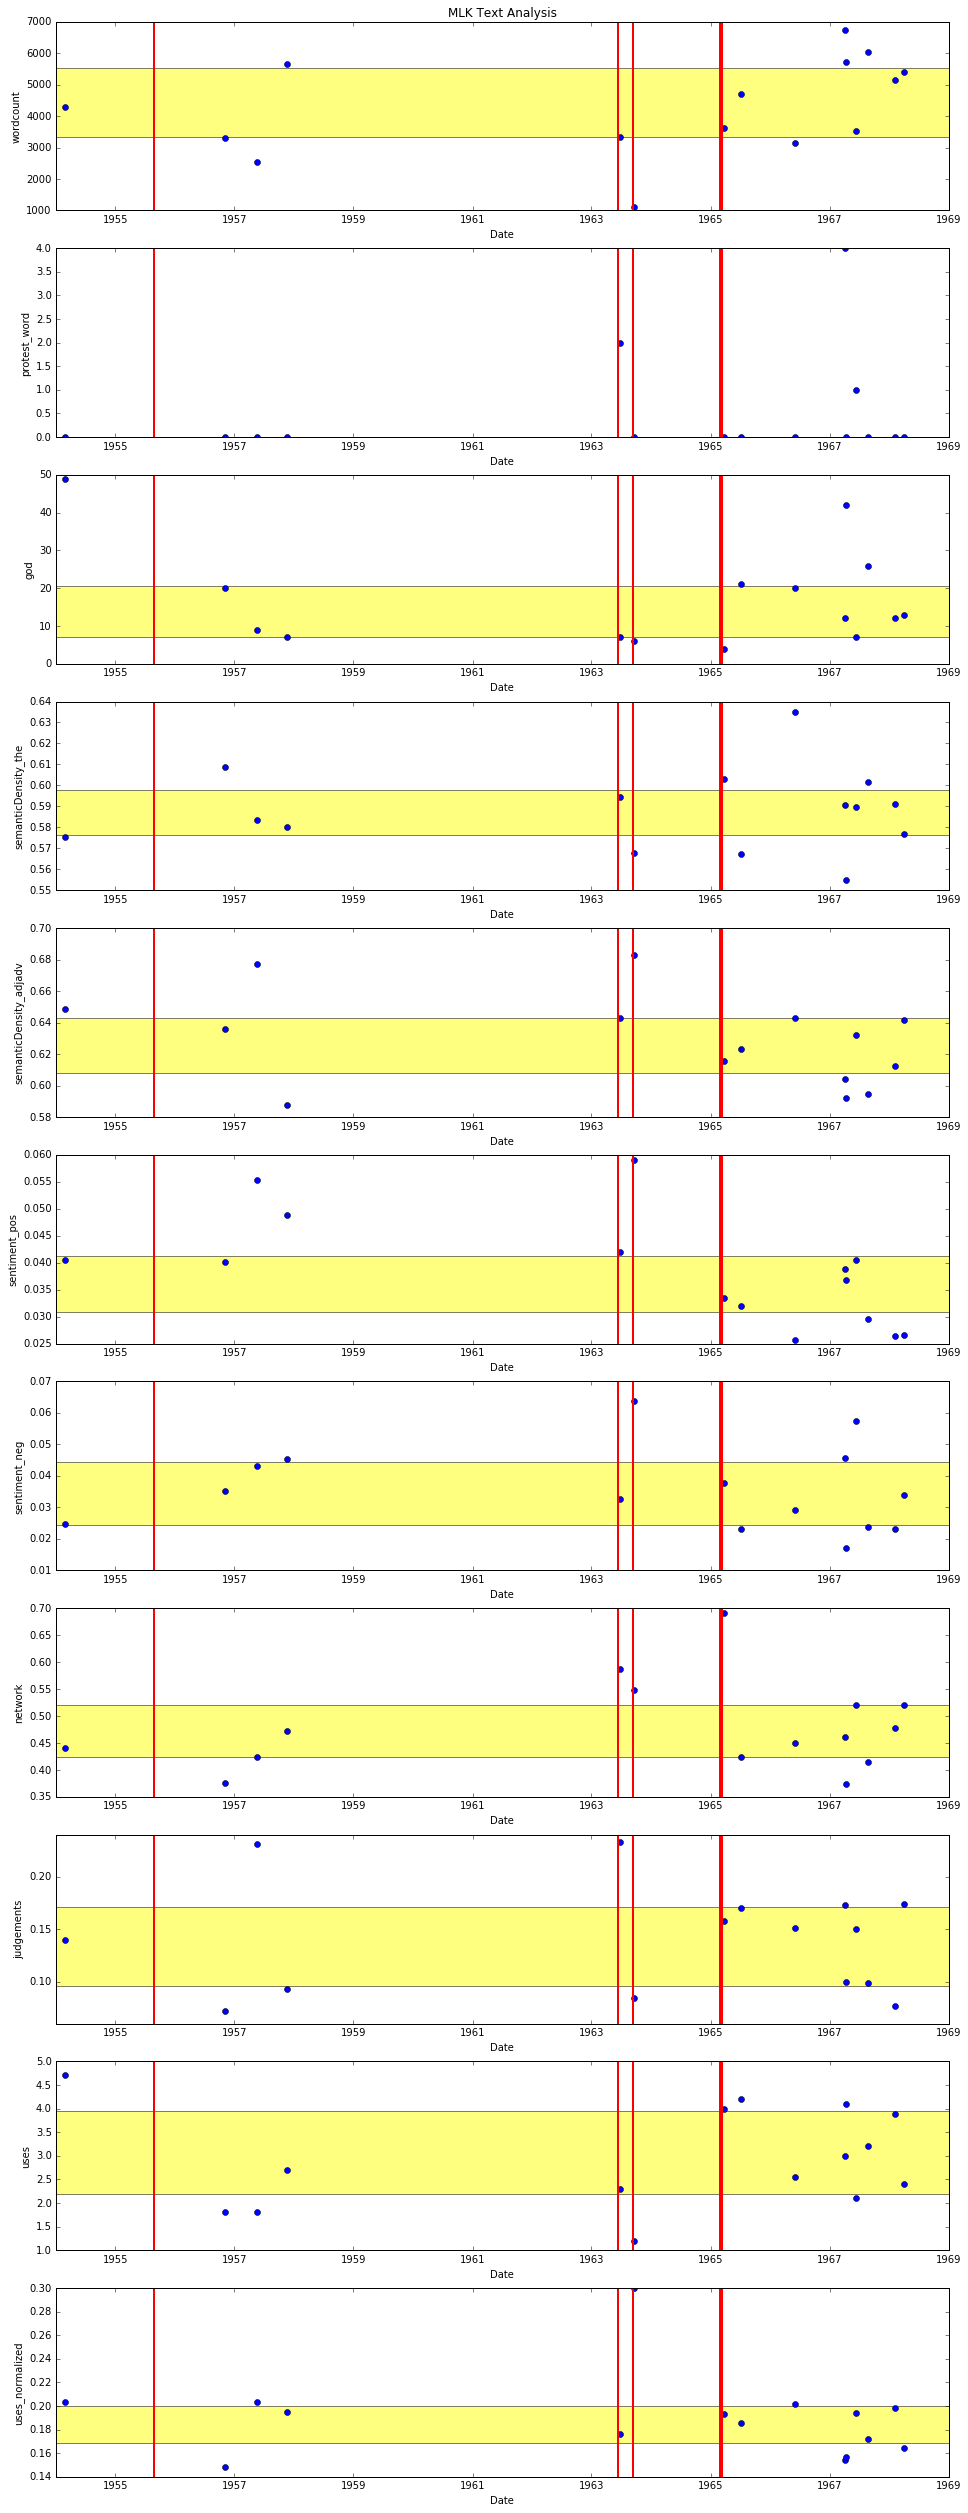

In [89]:
# Std parameters for each group defined at the top of the file
drawSignalPlots(fileData,fileData.columns,plotstart,plotend,group+'_temporal_all.pdf',d.Date,True)

1954-02-28 00:00:00 1968-03-31 00:00:00


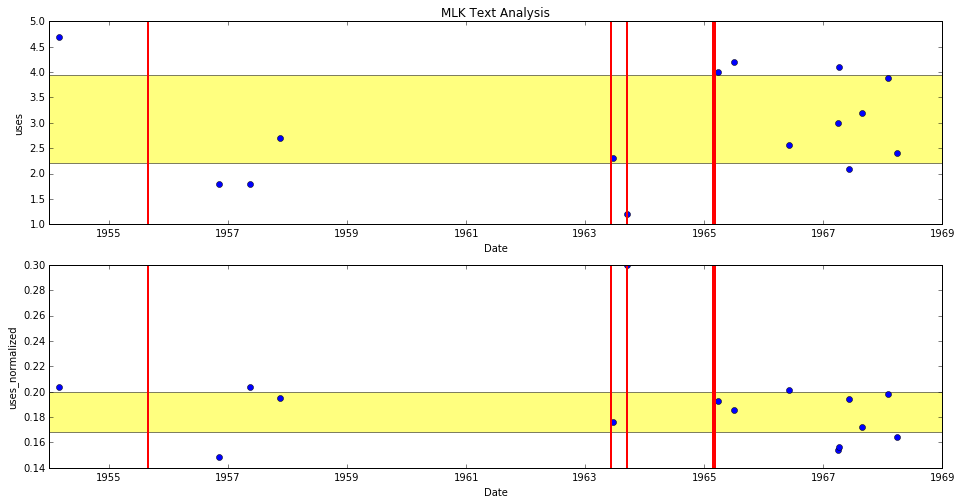

In [90]:
# Std parameters for each group defined at the top of the file
drawSignalPlots(fileData,['uses','uses_normalized'],plotstart,plotend,group+'_temporal_uses.pdf',d.Date,True)

### Draw plot with all signals on one graph, standardize the scale of the different signals

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
# Par Plot for all Signals in DF
def drawStdSignalPlots(fileData, signals, start_date, end_date, filename, events, save):
    
    signals = [var for var in signals if var not in ['fileName', 'date', 'date_clean']]

    # Standardize the Signals
    fd_normalized = fileData[['fileName','date_clean']]
    for signal in signals:
        fd_normalized[signal] = min_max_scaler.fit_transform(fileData[signal])  
        
    plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

    i = 1
    for signal in signals:
        # plt.subplot(len(signals), 1, i)
        plt.plot(fd_normalized.date_clean, fd_normalized[signal], '-', marker='o')
        # [plt.axvline(event, color = 'red', lw=2) for event in d.Date]
        [plt.axvline(e, color = 'red', lw=2) for e in events]
        # plt.plot(fd_normalized.date_clean, fd_normalized.semanticDensity)
        plt.ylabel('Normalized Signal')
        plt.xlabel("Date")
        if i == 1:
            plt.title(group+' Text Analysis')
        #plt.axhline(fd_normalized.god.mean(), color = 'green')
        # plt.axhspan(fd_normalized[signal].quantile(0.25), fd_normalized[signal].quantile(0.75), \
        #     facecolor='yellow', alpha=0.5)
        plt.xlim([start_date,end_date])
        i += 1
        plt.legend(loc='best', fancybox=True, framealpha=0.5)
    if save:
        plt.savefig('./protest_temporalAnalysis/'+filename)
    plt.show()
    
    # return fd_normalized

In [ ]:
drawStdSignalPlots(fileData,fileData.columns,plotstart,plotend,group+'_std_all.pdf',d.Date,True)

In [ ]:
fileData[['uses','uses_normalized']]

In [ ]:
drawStdSignalPlots(fileData,['uses','uses_normalized'],plotstart,plotend,group+'_std_uses.pdf',d.Date,True)

In [ ]:
drawStdSignalPlots(fileData,['semanticDensity_the','semanticDensity_adjadv'],plotstart,plotend,group+'_std_semDensity.pdf',d.Date,True)

In [ ]:
# Plotting w/ 2 Y-Scales
fig = plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

ax1 = fig.add_subplot(111)
ax1.plot(fileData.date_clean, fileData.uses, marker='o')
ax1.set_xlabel('date')
ax1.set_ylabel('semantic density')

ax2 = ax1.twinx()
ax2.plot(fileData.date_clean, fileData.uses_normalized, 'green', marker='o')
ax2.set_ylabel('word count')

plt.legend(loc='best', fancybox=True, framealpha=0.5)
plt.show()

In [ ]:
os.system('say "your program has finished"')